
<h1 align=center><u>Titanic Survival Prediction Using Logistic Regression Model</u></h2>

<h6>
    <b>Name:</b> Ashar Ul Haq <br>
    <b>Internship work:</b> Task 1 <br>
    <b>Company:</b> SoftCode
</h6>



In [98]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [99]:
#loading the data
#TSP = Titanic Survival Prediction
TSP_data = pd.read_csv(r'C:\Users\hp\Downloads\archive\tested.csv')

In [100]:
#overview of first few rows of our dataset
TSP_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b>Explaining the above dataset</b><br>
Survived: 0 --> not survived, 1 --> survived <br>
Pclass: Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd<br>
Sex: Sex<br>
Age: Age in years<br>
Sibsp: no. of siblings/spouses aboard the titanic<br>
Parch: no. of parents/childrens aboard the titanic<br>
Ticket: Ticket number<br>
Embarked: Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)


In [101]:
#Range of Dataset
TSP_data.index

RangeIndex(start=0, stop=418, step=1)

it will gives you the index of data, range index which starts from 0 and end at 418 records and the step between index is 1

In [102]:
#columns of data
TSP_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
#info of data
TSP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [104]:
#datatypes of the column
TSP_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [105]:
#stats of data
TSP_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200





<h2> DATA ANALYSIS </h2>
import seaborn for visually analysing the data


<Axes: xlabel='Survived', ylabel='count'>

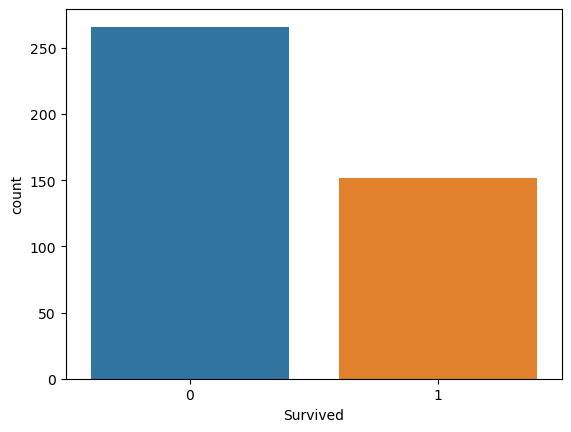

In [106]:
#survived vs not survived
sns.countplot(x='Survived', data=TSP_data)

In [107]:
#check for null values
TSP_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


getting some results in the form of true and false, so whenever there is false which means there is no null value for the particular value, but if there is a true that means this parituclar value here is null.

In [108]:
TSP_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

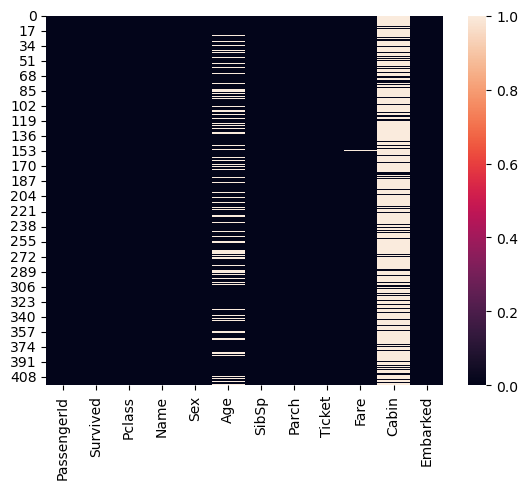

In [109]:
#visualize null values
sns.heatmap(TSP_data.isna())

Cabin, Fare and Age column has some null values.

In [110]:
#find % of null values in age column
TSP_data['Age'].isna().sum()/len(TSP_data['Age'])*100

20.574162679425836

In [111]:
#find % of null values in Cabin column
TSP_data['Cabin'].isna().sum()/len(TSP_data['Cabin'])*100

78.22966507177034

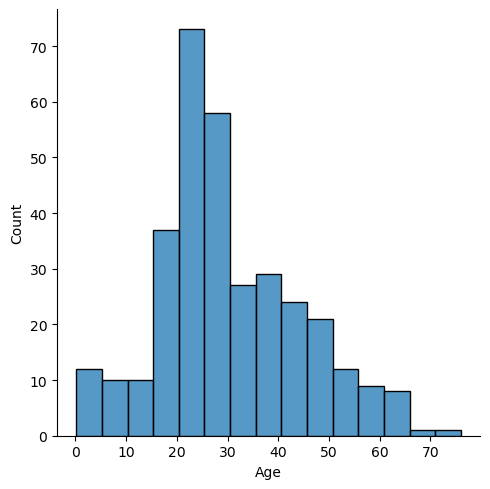

In [112]:
#visualizing the distribution for the age column
sns.displot(x='Age',data=TSP_data)




<h2> DATA CLEANING </h2>

In [113]:
#fill age column 
TSP_data['Age'].mean()

30.272590361445783

In [114]:
TSP_data['Age'].fillna(TSP_data['Age'].mean(), inplace = True)

In [115]:
#verifying that no more null data exist
TSP_data['Age'].isna().sum()

0

<Axes: >

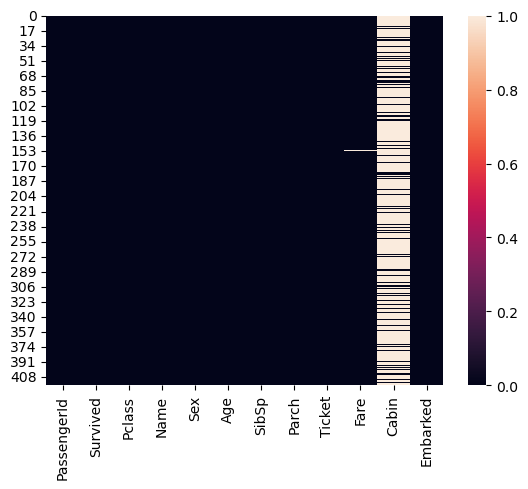

In [34]:
#visualizing null values
sns.heatmap(TSP_data.isna())

In [116]:
#fill fare column 
TSP_data['Fare'].mean()

35.627188489208635

In [117]:
TSP_data['Fare'].fillna(TSP_data['Fare'].mean(), inplace = True)

In [118]:
#verifying that no more null data exist
TSP_data['Fare'].isna().sum()

0

<Axes: >

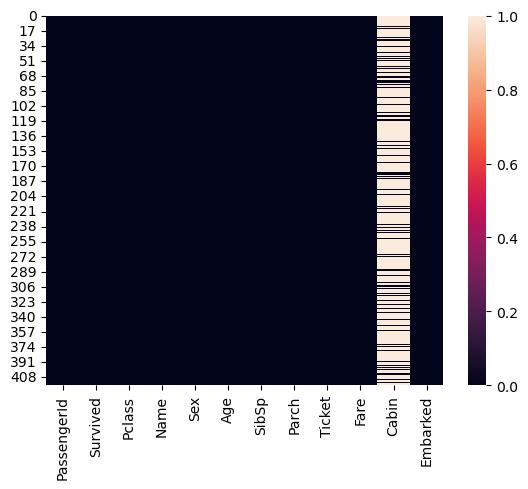

In [119]:
#visualizing null values
sns.heatmap(TSP_data.isna())

In [120]:
#dropping cabin column
TSP_data.drop('Cabin',axis=1,inplace=True)

In [121]:
#see the contents of the data
TSP_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<h2> PREPARAING DATA FOR MODEL </h2>

In [122]:
#check for the non numeric column
TSP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [123]:
TSP_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

<b> Name, Sex, Ticket and Embarked are non numerical.</b>

In [124]:
#convert sex column to numerical values
pd.get_dummies(TSP_data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [125]:
#dropping one of the column from above
gender = pd.get_dummies(TSP_data['Sex'],drop_first=True)

In [126]:
#adding gender column to the TSP data frame
TSP_data['Gender']=gender

In [127]:
#columns of the data
TSP_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [128]:
#viewing values of data
TSP_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [129]:
#dropping the columns which are not required
TSP_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [130]:
#dataframe after changes
TSP_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


Now, we have fully numerical values in our dataset, we will use all these columns for prediction now.

In [131]:
#separate independent and dependent values
x = TSP_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y = TSP_data['Survived']

In [132]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.50000,0,0,7.8292,1
1,893,3,47.00000,1,0,7.0000,0
2,894,2,62.00000,0,0,9.6875,1
3,895,3,27.00000,0,0,8.6625,1
4,896,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1
414,1306,1,39.00000,0,0,108.9000,0
415,1307,3,38.50000,0,0,7.2500,1
416,1308,3,30.27259,0,0,8.0500,1


In [133]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

<h2> DATA MODELING </h2>
<b> Building model using logistic regression </b>


In [134]:
#import train_test_split method
from sklearn.model_selection import train_test_split

In [135]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [136]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [137]:
#creating instance for logistic regression / fit logistic regression
lr = LogisticRegression()

In [138]:
lr

LogisticRegression()

In [139]:
lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
#prediction
prediction = lr.predict(x_test)

<h2> TESTING </h2>
<b>Testing model performance </b>

In [141]:
#print Confusion matrix
from sklearn.metrics import confusion_matrix

In [143]:
pd.DataFrame(confusion_matrix(y_test,prediction),columns = ['Predicted No','Predicted Yes'],index=["Actual No",'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,85,0
Actual Yes,0,41


In [144]:
#import classification report
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



<h4> Conclusion </h4>
The classification report demonstrates exceptional model performance. With a precision, recall, and F1-score of 1.00 for both classes, it indicates perfect accuracy in predicting both positive and negative cases. This outcome suggests that the model is making highly accurate and reliable predictions on the given dataset, achieving an overall accuracy of 100%.